# <center> Prueba de Aterrizaje de un Cohete </center>

<center><img src="cohete.jpg" width=400 height=400 /></center>
El objetivo de esta simulación es aterrizar un cohete en la superficie de un planeta sin estrellarse. El cohete comienza a una altura determinada y sucumbe a la gravedad. Si se deja solo, el cohete caería al planeta y se estrellaría a gran velocidad. El cohete tiene un motor y suficiente combustible para cinco encendidos de este. Si se utilizan todos al principio, entonces el cohete se elevará, se quedará sin combustible y luego se estrellará contra el suelo. En otro escenario, se permite que el cohete caiga durante un tiempo, luego el cohete usa uno de los
encendidos para disminuir el descenso. Este proceso continúa hasta que el cohete toca la superficie del planeta a una velocidad suficientemente pequeña.

Para aterrizar el cohete de manera segura, los encendidos deben programarse para los momentos correctos durante el vuelo. Sin embargo, esos momentos no se conocen. Por lo tanto, esta simulación tendrá dos fases. La primera es construir la simulación y la segunda es usar la simulación para encontrar los momentos correctos para los encendidos. Para complicar aún más el proceso, el cohete pierde masa con cada combustión.



### Creando la Simulación
Los parámetros iniciales son:

- h, la altura inicial,
- m0, la masa inicial del cohete,
- k, la tasa de pérdida de masa durante un encendido,
- F, la fuerza producida por un encendido, y
- g, la gravedad.

Se requieren varias ecuaciones para esta simulación, 
- La posición de un objeto que cae está determinada por,
  
**y2 = y1 + v1.δt + (1/2).g.δt^2**


Donde y1 y y2 son las posiciones es anterior y nueva, δt es la duración del tiempo, v1 es la
velocidad al comienzo de este tiempo, y g es la aceleración debida a la gravedad  ue
debe ser negativa.
- La ecuación para actualizar la velocidad 

 **v2 = v1 + g.δt**
 
 
  La aceleración es constante en g, excepto durante el encendido del propulsor. Entonces g+F/m1 donde F es la fuerza de la combustión y m es la masa al comienzo de la combustión.

- Durante la combustión del propulsor, la masa decae en

**m2 = m1 - k.δt**

donde k es una constante.

#### Construir la función Init que inicializa los valores, no posee entradas y se asignan en ella:

- La Altura inicial (y1) 1000, 
- La Masa inicial (m1) 15 000,
- La Gravedad (g) −2 (El valor debe ser negativo para que el cohete caiga),
- La velocidad Inicial (v1) 0
- El Tiempo (time) (Es el tiempo actual de la simulación que comienza en 0), 
- El Diferencial de Tiempo (dt) (Es el paso de tiempo utilizado en la simulación, esta simulación calculará nuevos valores en pasos de tiempo de 0,1 s.)
- La Fuerza (force) 50000 (se produce para un encendido del motor del cohete.)
- k 100 (constante de proporcion de perdida de masa por combustión)

Esas mismas deben ser las salidad de la funcion.

In [1]:
def InitLander () :
    y1 = 1000
    m1 = 15000
    g = -2
    v1 = 0
    time = 0.0
    dt = 0.1
    force = 50000
    k = 100
    return y1 , v1 , m1 , g , time , dt , force , k

#### Construir una función (Iterate) 
Que calcule los nuevos valores de aceleración (accel), velocidad (v2) y posición (y2) después de un único paso de tiempo.

- Las entradas son la gravedad, la posición actual, la velocidad actual, la aceleración adicional y la duración del paso de tiempo. 
- La variable aceleración adicional (aplus) es la aceleración adicional creada durante un encendido. Si el cohete está en caída libre, entonces aplus = 0 y la única aceleración se debe a la gravedad. 
- Se debe calcular aceleración total. Esto se utiliza para calcular la nueva velocidad y la nueva posición. Estos nuevos valores los retornará la funcion.

In [2]:
def Iterate (g , y1 , v1 , aplus , dt ) :
    accel = g + aplus
    v2 = v1 + accel * dt
    y2 = y1 + v1 * dt + 0.5* accel * dt **2
    return y2 , v2 , accel

#### Construir la función Burn 
Que calcula la contribución a la aceleración durante una combustion y la nueva masa. 
- Las entradas son el tiempo actual, la masa actual, la fuerza creada durante una combustión, la constante de decaimiento de masa y una lista de combustiones.

Cada combustion se representa con dos valores: el tiempo de inicio y la duración. Por lo tanto, la lista de combustiones es una lista de cinco tuplas, cada una con dos valores. Por ejemplo, burn = [ (10,2), (15,2), (20,3), (30,3), (35,3)] indica que la primera combustion comienza en t = 10 y dura 2 segundos.

Debe existir un valor de aplus, que es una aceleración adicional creada por una combustion. Su valor predeterminado es 0, lo que significa que el motor del cohete está apagado. Se debe confirmar si el tiempo actual está dentro de una ventana de combustion. Para que esto sea Verdadero, el tiempo actual debe ser mayor que el tiempo de inicio de una combustion y menor que ese tiempo de inicio más el tiempo de duración. Si esto es Verdadero, entonces el motor del cohete está encendido. 

- La famosa ecuación de Newton que relaciona fuerza, masa y aceleración es:
  
**F = ma**

 Se ha de calcular la aceleración, que es generada por fuerza producida por el motor. Esta combustion dura solo una pequeña cantidad de tiempo (el valor
elegido es 0,1 segundos). 

-Después de esta parte de la combustion, se debe calcular como la masa se reduce. Se debe evitar la búsqueda de posibles ventanas de quema si se ha encontrado una (con un break). 

- La función Burn devuelve la aceleración adicional y la nueva masa (la misma m1).

In [3]:
def Burn ( time , m1 , force , k , burns ) :
    aplus = 0
    for t1 , d in burns :
        if t1 < time < t1 + d :
            aplus = force / m1
            m1 = m1 - k
            break
    return aplus , m1

#### Construir la función RunLander 
Que ejecuta la simulación. 
- Recibe los valores iniciales creados por InitLander y la lista de las iteraciones.
  
Se deben descomprimir los valores iniciales, crear tres nuevas listas vacias que capturarán los valores calculados después de cada iteración y establecer un indicador (ok) en True. Cuando el cohete haya llegado al suelo, este indicador se establecerá en False y las iteraciones se detendrán.

Se comienzan las iteraciones y se determina si los valores de la iteración actual están dentro de una ventana de combustion (usando la funcion Burn). Se calcula los nuevos valores de posición, velocidad y aceleración (con la funcion Iterate). Se agregan estos nuevos valores calculados a las listas de archivo (metodo append). 

Se considera las condiciones de detención. Si la masa del cohete ha caído por debajo de un cierto valor (1000), entonces se ha quedado sin combustible y no hay razón para continuar porque es inminente un choque. Si la nueva posición es menor que 0, entonces el cohete ha tocado el suelo. Si se cumple alguna de estas condiciones, entonces ok=Falso y la simulación debe llegar a su fin. Se deben actualizar los valores de velocidad, posicion y tiempo para la próxima iteración. 

- Las listas que contiene los valores calculados son lo que devuelve la funcion al usuario.


Esta función no determina si el aterrizaje fue exitoso. Un aterrizaje exitoso es cuando el cohete llega al suelo con una velocidad pequeña, que es un umbral establecido por el usuario. Por ejemplo, si el umbral fuera 5, entonces cuando y2 < 0, la velocidad debe ser menor que 5, de lo contrario se considera que el cohete se ha estrellado.

In [4]:
def RunLander ( initvals , burns ) :
    y1 , v1 , m1 , g , time , dt , force , k = initvals
    vs , ys , acs = [] ,[] ,[]
    ok = True
    while ok :
        aplus , m1 = Burn ( time , m1 , force , k , burns )
        y2 , v2 , accel = Iterate ( g , y1 , v1 , aplus , dt )
        vs . append ( v2 ) ; ys . append ( y2 )
        acs . append ( accel )
        if m1 < 1000 or y2 <= 0:
            ok = False
        y1 , v1 = y2 , v2
        time += dt
    return ys , vs , acs


#### Por último, la función PlotLander 
Crea gráficos de los valores calculados. Estos valores se escalan para que puedan verse en el mismo gráfico. Los valores de posición se dividen por 100 y los valores de velocidad se dividen por 5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def PlotLander ( ys , vs , acs ) :
    ys1 = np . array ( ys ) /100.
    vs1 = np . array ( vs ) /5.
    plt . plot ( np . zeros (len( ys1 ) ))
    plt . plot ( vs1 )
    plt . plot ( ys1 )
    plt . plot ( acs )
    plt . show ()


Se muestra un único ensayo, donde los valores de combustión se generaron sin ninguna previsión. El resultado se muestra en la gráfica. El eje horizontal corresponde al tiempo. La línea que decae suavemente corresponde a la posición vertical, y estos valores se han dividido por 100 para que quepan en este gráfico. La simulación terminó porque el cohete llegó al suelo y, como se ve, esta curva termina en y = 0. La curva con los cinco empujes verticales es la aceleración. Tiene un valor
de -2 (el valor de gravedad predeterminado para este planeta) excepto durante las ventanas de combustión. Como se ve, durante la duración de la combustión, la aceleración aumenta.
La línea en zigzag corresponde a la velocidad del cohete. Inicialmente es 0, pero la gravedad aumenta la velocidad (negativa). Durante las quemas, la velocidad aumenta. El cohete ha aterrizado con éxito si este valor está por debajo de un umbral al final de la simulación. Los valores representados son los valores originales divididos por 5. Un umbral creíble sería que el valor absoluto de la velocidad fuera menor que 5, lo que significa que tendría que estar entre +1 y -1 en este gráfico. Como se ve, la velocidad final estaba muy lejos de ese umbral y, por lo tanto, este cohete se estrelló. Esto no es una sorpresa ya que los valores de combustión se eligieron sin ningún conocimiento de cómo afectarían el resultado.

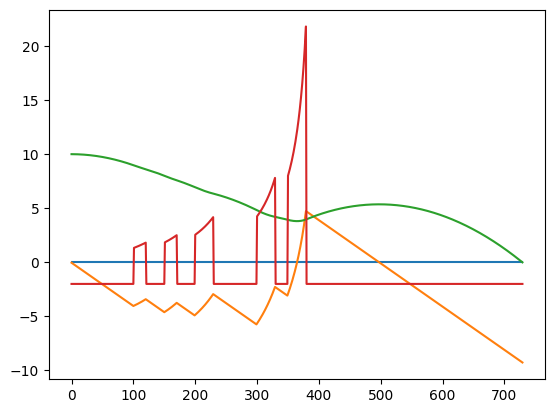

In [10]:
initvals =  InitLander ()
burns = [ (10 ,2) , (15 ,2) , (20 ,3) , (30 ,3) , (35 ,3) ]
ys , vs , acs =  RunLander ( initvals , burns )
PlotLander ( ys , vs , acs )


### <center> Consiguiendo los Parámetros correctos. </center>



In [71]:
#Función para calcula el tiempo que tarda en ejecutarse otra función
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()  #Empieza el contador
        result = func(*args,**kwargs)  #Llama la funcion a decorar
        end_time = time.time()  #Finaliza de contar
        print(f" {func.__name__!r} La función  tomó: {end_time - start_time:.4f}. segundos.")
        return result
        
    return wrapper


In [21]:
@timer
def ManyTrials ( N = 10 , gamma = 5) :
    goodburns = []
    for n in range( N ) :
        burns = []
        for i in range( 5 ) :
            a = 35 * np . random . random ()
            b = 5 * np . random . random ()
            burns . append ( (a , b ) )
        initvals = InitLander ()
        ys , vs , acs = RunLander ( initvals , burns )
        if abs( vs [ -1]) < gamma :
            goodburns . append ( burns )
    return goodburns

In [23]:
goodburns =  ManyTrials (100000 ,5)
print(len( goodburns ) )

 'ManyTrials' La función  tomó: 72.1828. segundos.
11


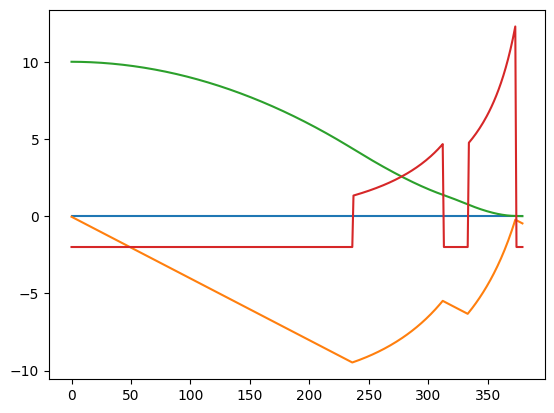

In [69]:
initvals =  InitLander ()
ys , vs , acs =  RunLander ( initvals , goodburns [0] )
PlotLander ( ys , vs , acs )

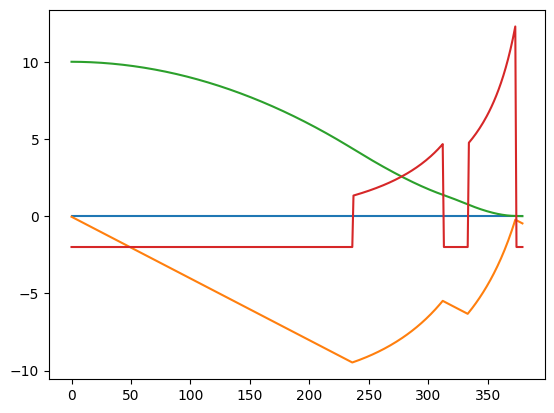

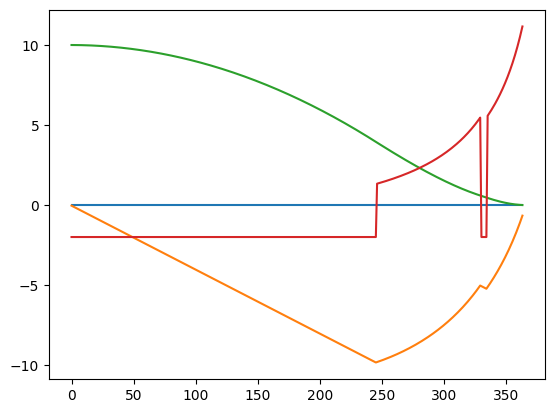

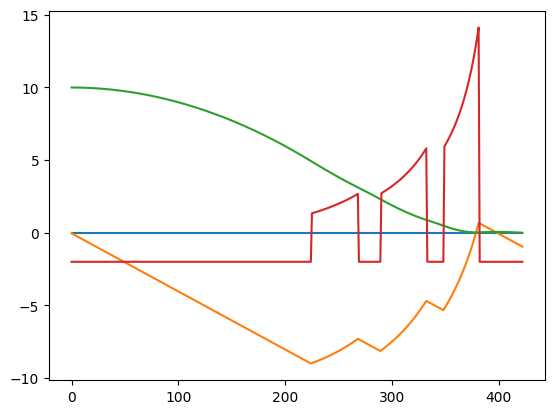

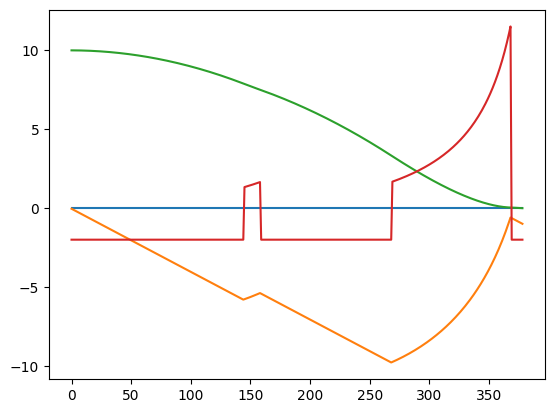

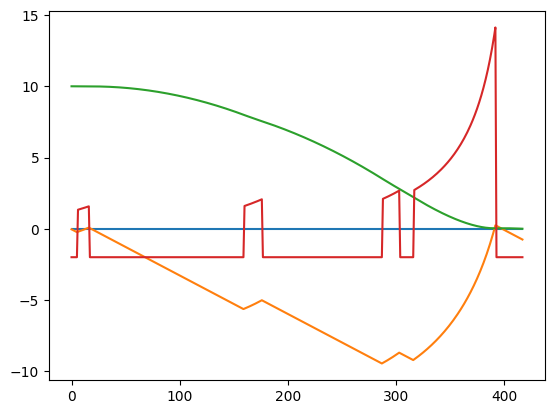

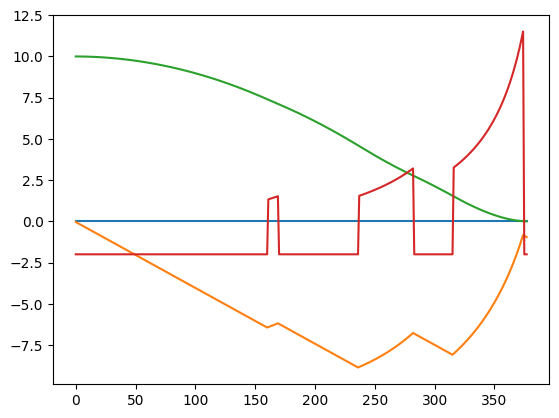

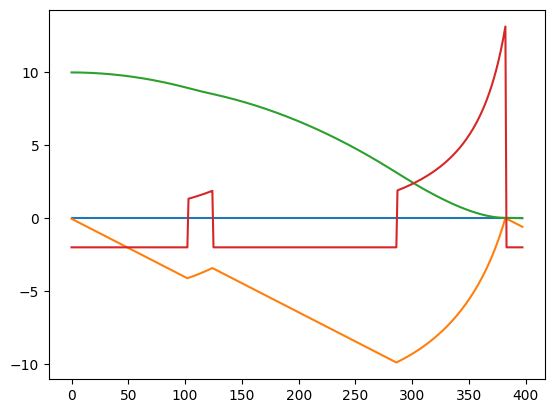

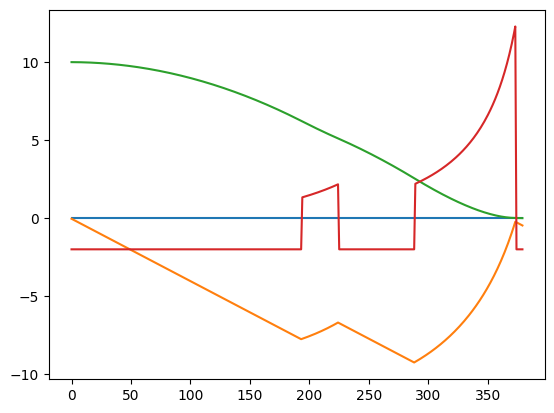

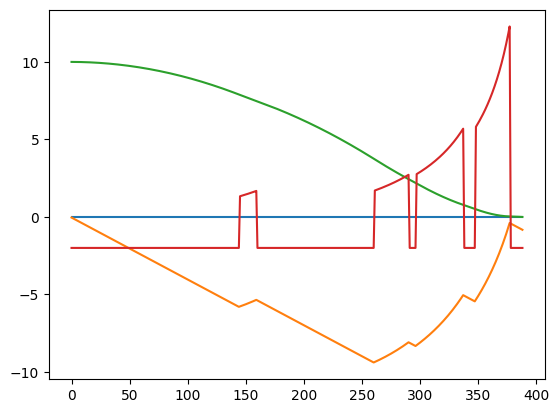

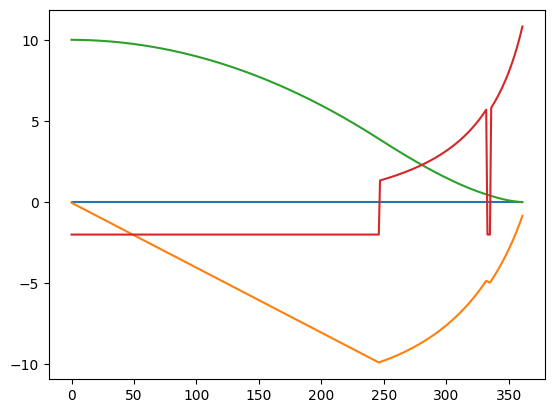

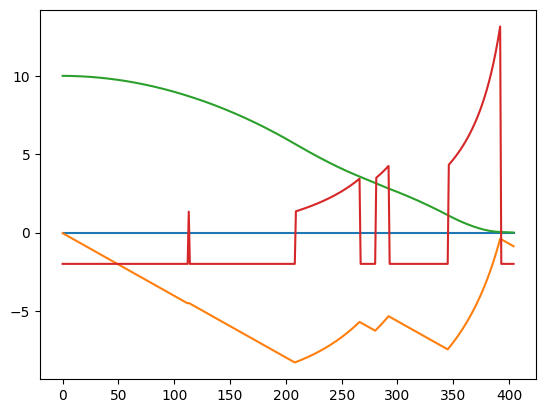

In [70]:
initvals =  InitLander ()
for goodburn in goodburns:
    ys , vs , acs =  RunLander ( initvals , goodburn )
    PlotLander ( ys , vs , acs )

### Bibliografía

Modeling and Simulation in  Python. Jason M. Kinser.
Capítulo 13.8